In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = (12,6)

In [2]:
df=pd.read_csv('toxic_comment.csv')
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


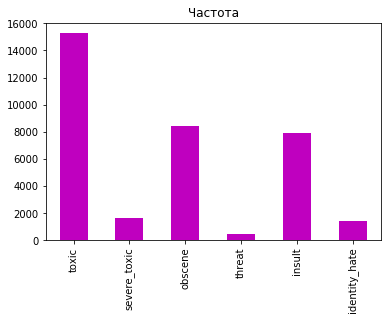

In [5]:
y=df.iloc[:,2:]
label_count = y.sum()
label_count.plot(kind='bar', title='Частота', color='m')

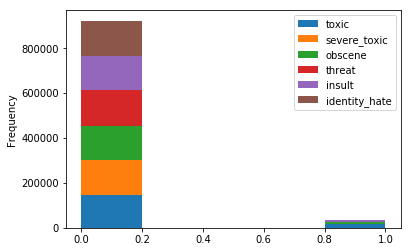

In [4]:
df[['toxic','severe_toxic','obscene','threat','insult','identity_hate']].plot.hist(stacked=True, bins=5)

In [14]:
#y_values=y.values
#y_train=np.array(y)

In [9]:
for i in df.columns[2:]:
    print(df[i].value_counts(),'\n')

0    144277
1     15294
Name: toxic, dtype: int64 

0    157976
1      1595
Name: severe_toxic, dtype: int64 

0    151122
1      8449
Name: obscene, dtype: int64 

0    159093
1       478
Name: threat, dtype: int64 

0    151694
1      7877
Name: insult, dtype: int64 

0    158166
1      1405
Name: identity_hate, dtype: int64 



In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
cv=CountVectorizer(strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1, 1), max_features=30000)

In [7]:
#X=cv.fit_transform(df['comment_text'])
#cv.transform(df['comment_text'])
X=df['comment_text']


In [8]:
X_tr=cv.fit_transform(X)
X_tr

<159571x30000 sparse matrix of type '<class 'numpy.int64'>'
	with 7014238 stored elements in Compressed Sparse Row format>

In [19]:
print(cv.get_feature_names());

['0', '00', '000', '0000', '000000', '0000z', '0001', '001', '002', '004', '007', '01', '02', '03', '04', '0422', '05', '06', '0600z', '07', '08', '084080', '09', '093', '096', '0em', '0px', '0rr', '0waldo', '1', '10', '100', '1000', '10000', '100000', '1000s', '1003', '1005', '100k', '100s', '100th', '100x', '101', '102', '1024', '103', '104', '105', '106', '107', '108', '1080', '109', '1091', '10c', '10k', '10px', '10th', '10x', '11', '110', '1100', '111', '112', '113', '114', '115', '116', '117', '118', '1185', '119', '11th', '12', '120', '1200', '1200z', '121', '122', '123', '124', '125', '126', '127', '1279', '128', '1280', '129', '12th', '13', '130', '1300', '131', '132', '133', '134', '135', '136', '137', '138', '13843046_dmcc48', '139', '13th', '14', '140', '1400', '141', '1415', '1416', '142', '143', '144', '145', '1450', '146', '147', '148', '149', '14th', '15', '150', '1500', '15000', '151', '152', '1526', '153', '1534', '154', '1542', '155', '156', '157', '158', '159', '15t

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(X_tr, y, test_size=0.33)

In [10]:
from sklearn.naive_bayes import MultinomialNB

In [11]:
clf_1 = MultinomialNB()
clf_2=MultinomialNB()
clf_3=MultinomialNB()
clf_4=MultinomialNB()
clf_5=MultinomialNB()
clf_6=MultinomialNB()

In [15]:
clf_1.fit(X_train,y_train.iloc[:,0])
clf_2.fit(X_train,y_train.iloc[:,1])
clf_3.fit(X_train,y_train.iloc[:,2])
clf_4.fit(X_train,y_train.iloc[:,3])
clf_5.fit(X_train,y_train.iloc[:,4])
clf_6.fit(X_train,y_train.iloc[:,5])

answer_train=[]
answer_train.append(clf_1.score(X_train,y_train.iloc[:,0]))
answer_train.append(clf_2.score(X_train,y_train.iloc[:,1]))
answer_train.append(clf_3.score(X_train,y_train.iloc[:,2]))
answer_train.append(clf_4.score(X_train,y_train.iloc[:,3]))
answer_train.append(clf_5.score(X_train,y_train.iloc[:,4]))
answer_train.append(clf_6.score(X_train,y_train.iloc[:,5]))
print(np.mean(answer_train),' - answer_train')

answer_test=[]
answer_test.append(clf_1.score(X_test,y_test.iloc[:,0]))
answer_test.append(clf_2.score(X_test,y_test.iloc[:,1]))
answer_test.append(clf_3.score(X_test,y_test.iloc[:,2]))
answer_test.append(clf_4.score(X_test,y_test.iloc[:,3]))
answer_test.append(clf_5.score(X_test,y_test.iloc[:,4]))
answer_test.append(clf_6.score(X_test,y_test.iloc[:,5]))
print(np.mean(answer_test),' - answer_test')

0.9704741594333033  - answer_train
0.9678212651208721  - answer_test


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
TFV=TfidfVectorizer(sublinear_tf=True, strip_accents='unicode', analyzer='word',\
                    token_pattern=r'\w{1,}', ngram_range=(1, 1), max_features=30000)
X_TFV=TFV.fit_transform(X)
X_TFV

<159571x30000 sparse matrix of type '<class 'numpy.float64'>'
	with 7014238 stored elements in Compressed Sparse Row format>

In [18]:
print(TFV.get_feature_names());

['0', '00', '000', '0000', '000000', '0000z', '0001', '001', '002', '004', '007', '01', '02', '03', '04', '0422', '05', '06', '0600z', '07', '08', '084080', '09', '093', '096', '0em', '0px', '0rr', '0waldo', '1', '10', '100', '1000', '10000', '100000', '1000s', '1003', '1005', '100k', '100s', '100th', '100x', '101', '102', '1024', '103', '104', '105', '106', '107', '108', '1080', '109', '1091', '10c', '10k', '10px', '10th', '10x', '11', '110', '1100', '111', '112', '113', '114', '115', '116', '117', '118', '1185', '119', '11th', '12', '120', '1200', '1200z', '121', '122', '123', '124', '125', '126', '127', '1279', '128', '1280', '129', '12th', '13', '130', '1300', '131', '132', '133', '134', '135', '136', '137', '138', '13843046_dmcc48', '139', '13th', '14', '140', '1400', '141', '1415', '1416', '142', '143', '144', '145', '1450', '146', '147', '148', '149', '14th', '15', '150', '1500', '15000', '151', '152', '1526', '153', '1534', '154', '1542', '155', '156', '157', '158', '159', '15t

In [19]:
X_train,X_test, y_train, y_test=train_test_split(X_TFV, y, test_size=0.33)

In [20]:
clf_1 = MultinomialNB()
clf_2=MultinomialNB()
clf_3=MultinomialNB()
clf_4=MultinomialNB()
clf_5=MultinomialNB()
clf_6=MultinomialNB()

clf_1.fit(X_train,y_train.iloc[:,0])
clf_2.fit(X_train,y_train.iloc[:,1])
clf_3.fit(X_train,y_train.iloc[:,2])
clf_4.fit(X_train,y_train.iloc[:,3])
clf_5.fit(X_train,y_train.iloc[:,4])
clf_6.fit(X_train,y_train.iloc[:,5])

answer_train=[]
answer_train.append(clf_1.score(X_train,y_train.iloc[:,0]))
answer_train.append(clf_2.score(X_train,y_train.iloc[:,1]))
answer_train.append(clf_3.score(X_train,y_train.iloc[:,2]))
answer_train.append(clf_4.score(X_train,y_train.iloc[:,3]))
answer_train.append(clf_5.score(X_train,y_train.iloc[:,4]))
answer_train.append(clf_6.score(X_train,y_train.iloc[:,5]))
print(np.mean(answer_train),' - answer_train')

answer_test=[]
answer_test.append(clf_1.score(X_test,y_test.iloc[:,0]))
answer_test.append(clf_2.score(X_test,y_test.iloc[:,1]))
answer_test.append(clf_3.score(X_test,y_test.iloc[:,2]))
answer_test.append(clf_4.score(X_test,y_test.iloc[:,3]))
answer_test.append(clf_5.score(X_test,y_test.iloc[:,4]))
answer_test.append(clf_6.score(X_test,y_test.iloc[:,5]))
print(np.mean(answer_test),' - answer_test')

0.9746239898234063  - answer_train
0.9741576305411548  - answer_test


In [22]:
from sklearn.linear_model import LogisticRegression

In [26]:
LR_1=LogisticRegression().fit(X_train,y_train.iloc[:,0])
LR_2=LogisticRegression().fit(X_train,y_train.iloc[:,1])
LR_3=LogisticRegression().fit(X_train,y_train.iloc[:,2])
LR_4=LogisticRegression().fit(X_train,y_train.iloc[:,3])
LR_5=LogisticRegression().fit(X_train,y_train.iloc[:,4])
LR_6=LogisticRegression().fit(X_train,y_train.iloc[:,5])

answer_train=[]
answer_train.append(LR_1.score(X_train,y_train.iloc[:,0]))
answer_train.append(LR_2.score(X_train,y_train.iloc[:,1]))
answer_train.append(LR_3.score(X_train,y_train.iloc[:,2]))
answer_train.append(LR_4.score(X_train,y_train.iloc[:,3]))
answer_train.append(LR_5.score(X_train,y_train.iloc[:,4]))
answer_train.append(LR_6.score(X_train,y_train.iloc[:,5]))
print(np.mean(answer_train),' - train')

answer_test=[]
answer_test.append(LR_1.score(X_test,y_test.iloc[:,0]))
answer_test.append(LR_2.score(X_test,y_test.iloc[:,1]))
answer_test.append(LR_3.score(X_test,y_test.iloc[:,2]))
answer_test.append(LR_4.score(X_test,y_test.iloc[:,3]))
answer_test.append(LR_5.score(X_test,y_test.iloc[:,4]))
answer_test.append(LR_6.score(X_test,y_test.iloc[:,5]))
print(np.mean(answer_test),' - test')

0.9826009553028037  - train
0.9810415440222311  - test
